<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis-(EDA)-Module" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-Module-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA) Module</a></span><ul class="toc-item"><li><span><a href="#Load--Data" data-toc-modified-id="Load--Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load  Data</a></span></li><li><span><a href="#Column-Description" data-toc-modified-id="Column-Description-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Column Description</a></span></li><li><span><a href="#Correlation-Analysis" data-toc-modified-id="Correlation-Analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Correlation Analysis</a></span></li><li><span><a href="#Column-Drill-down" data-toc-modified-id="Column-Drill-down-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Column Drill-down</a></span></li><li><span><a href="#Aggregate-Statistics" data-toc-modified-id="Aggregate-Statistics-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Aggregate Statistics</a></span></li></ul></li></ul></div>

# Exploratory Data Analysis (EDA) Module

In [1]:
import os
import sys
import time
import json
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy.stats as stats
sns.set(color_codes=True)
%precision 3
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import logging
logging.disable(logging.ERROR)

In [6]:
import edatools.eda_table as et
import edatools.eda_display_utils as edu
import edatools.eda_bq_utils as ebu
from importlib import reload

## Load  Data

In [4]:
mpg = pd.read_csv("https://raw.githubusercontent.com/jykim/dbook/master/mpg.txt", sep="\t")

In [8]:
import pandas_profiling
profile = mpg.profile_report(style={'full_width':True})
profile.to_file(output_file="profile_mpg.html")

In [5]:
eb = et.EDATable(mpg)

## Column Description

In [6]:
eb.head()

,manufacturer,model,trans,drv,displ,year,cyl,cty,hwy,fl,class
0,dodge,durango 4wd,auto(l4),4,3.9,1999,6,13,17,r,suv
1,ford,f150 pickup 4wd,manual(m5),4,4.6,1999,8,13,16,r,pickup
2,volkswagen,gti,auto(l4),f,2.0,1999,4,19,26,r,compact
3,nissan,altima,manual(m5),f,2.4,1999,4,21,29,r,compact
4,volkswagen,gti,auto(s6),f,2.0,2008,4,22,29,p,compact
5,volkswagen,gti,manual(m5),f,2.0,1999,4,21,29,r,compact
6,land rover,range rover,auto(s6),4,4.2,2008,8,12,18,r,suv
7,toyota,camry,auto(l5),f,2.4,2008,4,21,31,r,midsize
8,ford,mustang,auto(l5),r,4.0,2008,6,16,24,r,subcompact
9,volkswagen,gti,manual(m6),f,2.0,2008,4,21,29,p,compact


In [7]:
eb.colinfo()

,DataType,ValueCount,NullCount,0,1,2
manufacturer,object,15,0,dodge,ford,volkswagen
model,object,38,0,durango 4wd,f150 pickup 4wd,gti
trans,object,10,0,auto(l4),manual(m5),auto(l4)
drv,object,3,0,4,4,f
displ,float64,35,0,3.9,4.6,2
year,int64,2,0,1999,1999,1999
cyl,int64,4,0,6,8,4
cty,int64,21,0,13,13,19
hwy,int64,27,0,17,16,26
fl,object,5,0,r,r,r


In [8]:
style.use('fivethirtyeight')
eb.desc(outputcol=4, max_bins=10, figsize=(4,4))

"<img src=""data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASAAAAEgCAYAAAAUg66AAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAIi0lEQVR4nO3dT2icBRrH8WeGWIRtpRqGguZQ/NdepGiD4k3FQ9EET4uHxWJRxNMWYW09FOqCuFjXw17aRSsUxQVdCyuIKSiKIkWPuiCUgrQ0FrTNBtMamkQze1i2kGWxJfOmv8n08zllwvs%2BeXL5Mu87yUyr2%2B12CyCgnV4AuHoJEBAjQECMAAExAgTECBAQI0BAjAABMQIExAgQECNAQIwAATECBMQIEBAjQECMANGoTz75pDZt2pReg1VCgIAYAQJiBIienDx5sh5//PHasmVLjY%2BP1/Hjx6uqanJysjZt2lT79%2B%2Bvu%2B%2B%2Bu5588sm6//7764033lhy/tNPP1179%2B5NrE4fGEovwOq1sLBQTz31VN1yyy11%2BPDh%2Bvbbb2vPnj1Ljvnss8/qnXfeqYWFhXrvvfdqYmKitm/fXlVVMzMz9fnnn9ehQ4cC29MPBIhlO3r0aJ0%2BfbrefvvtWr9%2Bfd1666114sSJeuWVVy4es3379tq4cWNVVY2NjdXBgwfr%2B%2B%2B/rw0bNtSHH35YnU6ntm7dGvoNSHMJxrIdP368brzxxlq/fv3F791xxx1LjhkZGbn49ebNm%2Bu2226riYmJqqr64IMP6qGHHqpWq3VlFqbvCBDL9v/Ccc011yx5fO211y55PDY2VkeOHKnp6en64osvanx8fEV3pL8JEMt2%2B%2B2313fffVdnz569%2BL1vvvnmV88ZGxurr7/%2But59993auHFjbd68eaXXpI8JEMt277331s0331y7d%2B%2BuY8eO1aefflqvvvrqr55z00031ZYtW2r//v01NjZ2hTalXwkQyzY0NFSvvfZaDQ0N1aOPPlovvvhi7dix45LnjY%2BP1%2BzsrABRLR/NDKR4BgTECBAQI0BAjAABMQIExAgQENMX/4w6Pf1TLS72/18DDA%2Bvramp8%2Bk1Lttq2teuK2Mld223W3X99b/paUZfBGhxsbsqAlRVq2bP/1pN%2B9p1ZfTzri7BgBgBAmIECIgRICBGgIAY/w0PLHFhbqHOzVy45HHtdquGh9f29LP64mX43//pH3V2%2Bqf0GkBV/W3f7%2BpcXTpATXAJBsQIEBAjQECMAAExAgTECBAQI0BAjAABMQIExAgQECNAQIwAATECBMQIEBAjQECMAAExAgTECBAQI0BAjAABMQIExAgQECNAQIwAATECBMQ0HqADBw7U6Oho3XPPPTUzM9P0eGCANB6gw4cP1zPPPFNffvllXXfddU2PBwZIowF68MEHa3Jysl566aV67rnnmhwNDKChJod99NFH9cADD9SuXbtq27ZtTY4GBpCb0ECMAAExAgTECBAQI0BATKOvglVVffzxx02PBAaUZ0BAjAABMQIExAgQECNAQIwAATECBMQIEBAjQECMAAExAgTECBAQI0BAjAABMQIExAgQECNAQIwAATECBMQIEBAjQECMAAExAgTECBAQI0BAjAABMQIExLS63W43vQTQPy7MLdS5mQuXPK7dbtXw8NqeftZQT2c3ZGrqfC0u9n8HO511debMufQal2017WvXldHvu7oEA2IECIgRICBGgIAYAQJiBAiIESAgRoCAGAECYgQIiBEgIEaAgBgBAmIECIjxfkBwlfp5fq6mf5xf9vkD835A//zr7pqfmUqvAVeVrbsOVtXyA9QEl2BAjAABMQIExAgQECNAQIwAATECBMQIEBAjQECMAAExAgTECBAQI0BAjAABMQIExAgQECNAQIwAATECBMQIEBAjQECMAAExAgTECBAQI0BATKMBmp2drW3bttXrr7/e5FhgQDUaoBdeeKFOnjzZ5EhggDUWoImJiTpx4kTdddddTY0EBlwjATp9%2BnS9/PLLtW/fvmq33VYCLk/Ptfjll1/q2WefrZ07d9bIyEgTOwFXiZ4DdODAgdqwYUM98sgjTewDXEWGeh3w/vvv1w8//FCjo6NV9Z9Xwr766qs6depUPf/8872OBwZYzwE6cuTIksePPfZY3XffffXEE0/0OhoYcO4YAzE9PwP6X2%2B%2B%2BWbTI4EB5RkQECNAQIwAATECBMQIEBAjQECMAAExAgTECBAQI0BAjAABMQIExAgQECNAQIwAATECBMQIEBAjQECMAAExAgTECBAQI0BAjAABMQIExAgQECNAQEyr2%2B1200sAV97P83M1/eP8ss9vt1s1PLy2px0a/2z45ZiaOl%2BLi/3fwU5nXZ05cy69xmVbTfvadWX0%2B64uwYAYAQJiBAiIESAgRoCAGAECYgQIiBEgIEaAgBgBAmIECIgRICBGgIAYAQJi%2BuLtOHp9T5ErqdNZd1nHzc3P18yPcyu8DaxufRGgP/z9j3X2/L/SazTq0I6/VJUAwa9xCQbECBAQI0BAjAABMQIExAgQECNAQIwAATECBMQIEBAjQECMAAExAgTECBAQI0BAjAABMQIExAgQECNAQIwAATECBMQIEBAjQECMAAExAgTECBAQI0BAjAABMY0GaHJysu68887as2dPjY6O1ltvvdXkeGDADDU9cHZ2tm644YY6evRoLSwsND0eGCCNB6iq6uGHH641a9bUmjVrVmI8MCBW5B5Qp9NZibHAgHETGogRICBGgICYRm9Cj4yM1LFjx5ocCQwwz4CAGAECYgQIiBEgIEaAgBgBAmIECIgRICBGgIAYAQJiBAiIESAgRoCAGAECYgQIiBEgIEaAgBgBAmIECIgRICBGgIAYAQJiBAiIESAgRoCAGAECYhr9aObl%2BvNv96ZXaNzc/Hx6Beh7fRGgqanztbjYTa9xSZ3Oujpz5lx6DRgYLsGAGAECYgQIiBEgIEaAgJi%2BeBWs3W6lV7hsq2nXqtW1r11Xxkrt2sTcVrfb7f/Xv4GB5BIMiBEgIEaAgBgBAmIECIgRICBGgIAYAQJiBAiIESAgRoCAGAECYgQIiBEgIEaAgJh/A3P4mAJIcaAAAAAAAElFTkSuQmCC"">"
"<img src=""data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASAAAAEgCAYAAAAUg66AAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAJvUlEQVR4nO3dX4hWdRrA8WdGcxd3RHOYZqIJvNMQJ8Q/UUilFYVBEWEQImSEbUF7scRuRbAtFIsWG1sIiy7tupUZVmhE3RQahJSNVwYhdFPNDNX4qunYOuM4797JDsHK7vubeQ5nPp87Dy/PPJyLL%2B9vPJxpazabzQBI0J69ADBzCRCQRoCANAIEpBEgII0AAWkECEgjQEAaAQLSCBCQRoCANAIEpBEgII0AAWkECEgjQEyJ/v7%2BuPXWW2PZsmWxePHiOHDgQPZKVJAAMSW2b98eixYtig8%2B%2BCB7FSpMgJgSp0%2Bfjr6%2Bvujt7c1ehQqbnb0A9bNu3boYHByML774IrZv3569DhXmGxDFvfXWW7FkyZJ48MEH45NPPslehwoTIIpbuHBhzJo1K%2BbOnRtdXV3Z61BhAgSkESAgjQABaQQISCNAQJo2f5oZyOIbEJBGgIA0AgSkESAgjQABaQQISFOZ13GcPHk2JiY8ERAR0dnZEY3GSPYaleF%2BTFa

<Figure size 288x288 with 0 Axes>

In [9]:
eb.desc_detail(['drv', 'displ'], proportiontocut=0.2);

<Figure size 360x360 with 0 Axes>

## Correlation Analysis

In [10]:
eb.corr()

,displ,year,cyl,cty,hwy
displ,1,0.152,0.941,-0.881,-0.827
year,0.152,1,0.119,-0.007,0.04
cyl,0.941,0.119,1,-0.867,-0.793
cty,-0.881,-0.007,-0.867,1,0.954
hwy,-0.827,0.04,-0.793,0.954,1


,year,cyl,cty,hwy
cty,-0.006856,-0.866962,1.0,0.95421


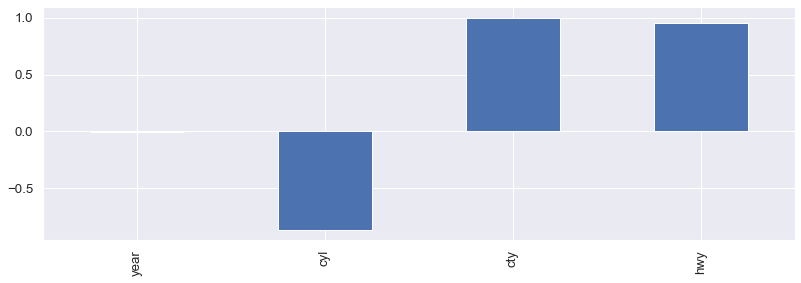

In [11]:
eb.corr_with('cty')

In [12]:
eb.pairplot(["displ","year", "trans"], ["cyl", "cty", 'class'], figsize=(5,5))

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [13]:
eb.pairplot_scatter_with_hover("displ", ["hwy", "cty"], color='class', hover_cols=['class', 'model', 'year'], 
                               alpha=0.5, size=10, figsize=(400,400))

,


In [14]:
eb.pairplot_scatter_with_hover("displ", ["hwy", "cty"], color='cyl', color_scale='linear', hover_cols=['class', 'model', 'year'], 
                               alpha=0.5, size=10, figsize=(400,400))

,


## Column Drill-down

You can also divide the table into sub-groups and run the same analysis as below

In [15]:
for e in eb.groupby("class"):
    e.corr()
    e.desc(['displ','cty','hwy'])

,displ,year,cyl,cty,hwy
displ,1,0.121,0.817,-0.631,-0.634
year,0.121,1,-0.127,0.224,0.226
cyl,0.817,-0.127,1,-0.683,-0.598
cty,-0.631,0.224,-0.683,1,0.887
hwy,-0.634,0.226,-0.598,0.887,1


,displ,year,cyl,cty,hwy
displ,1,0.239,0.872,-0.599,-0.541
year,0.239,1,-0.017,0.304,0.325
cyl,0.872,-0.017,1,-0.731,-0.761
cty,-0.599,0.304,-0.731,1,0.757
hwy,-0.541,0.325,-0.761,0.757,1


,displ,year,cyl,cty,hwy
displ,1,0.087,0.876,-0.792,-0.655
year,0.087,1,0.213,0.023,0.147
cyl,0.876,0.213,1,-0.814,-0.7
cty,-0.792,0.023,-0.814,1,0.916
hwy,-0.655,0.147,-0.7,0.916,1


,displ,year,cyl,cty,hwy
displ,1,0.298,0.879,-0.921,-0.894
year,0.298,1,0.368,-0.248,-0.172
cyl,0.879,0.368,1,-0.832,-0.792
cty,-0.921,-0.248,-0.832,1,0.96
hwy,-0.894,-0.172,-0.792,0.96,1


,displ,year,cyl,cty,hwy
displ,1,0.13,0.863,-0.686,-0.534
year,0.13,1,0.163,-0.004,0.297
cyl,0.863,0.163,1,-0.789,-0.614
cty,-0.686,-0.004,-0.789,1,0.792
hwy,-0.534,0.297,-0.614,0.792,1


<Figure size 360x360 with 0 Axes>

## Aggregate Statistics

In [16]:
mpg['displ_large'] = mpg.displ.apply(lambda e: True if e > 4.5 else False)
FACETS = ['year', 'class', 'displ_large']
METRICS = ['cty', 'hwy']
ea = edu.agg_dataframe(mpg, FACETS, METRICS)
ea

,year,class,displ_large,sample_size,cty_avg,cty_sum,cty_ssq,cty_ci95,hwy_avg,hwy_sum,hwy_ssq,hwy_ci95
0,1999,2seater,True,2.0,15.500000,31.0,481.0,0.979982,24.500000,49.0,1205.0,2.939946
1,1999,compact,False,25.0,19.760000,494.0,10126.0,1.527766,27.920000,698.0,19942.0,1.704605
2,1999,midsize,False,20.0,18.150000,363.0,6635.0,0.685987,26.500000,530.0,14076.0,0.559805
3,1999,minivan,False,6.0,16.166667,97.0,1575.0,0.935414,22.500000,135.0,3045.0,0.979982
4,1999,pickup,False,8.0,14.500000,116.0,1688.0,0.641549,18.000000,144.0,2606.0,0.979982
5,1999,pickup,True,8.0,11.500000,92.0,1064.0,0.641549,15.625000,125.0,1957.0,0.515573
6,1999,subcompact,False,17.0,22.352941,380.0,8852.0,2.248194,29.882353,508.0,15658.0,2.597590
7,1999,subcompact,True,2.0,15.000000,30.0,450.0,0.000000,21.500000,43.0,925.0,0.979982
8,1999,suv,False,15.0,14.800000,222.0,3328.0,0.880687,18.733333,281.0,5371.0,1.398605
9,1999,suv,True,14.0,11.857143,166.0,1988.0,0.645064,16.285714,228.0,3724.0,0.478707


In [17]:
pd.pivot_table(ea, index='displ_large', columns='class', values='sample_size', aggfunc=np.sum)

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
displ_large,,,,,,,
False,NaN,47.0,40.0,11.0,13.0,30.0,27.0
True,5.0,NaN,1.0,NaN,20.0,5.0,35.0


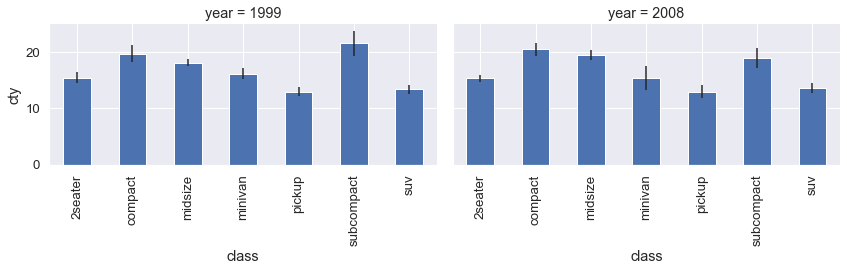

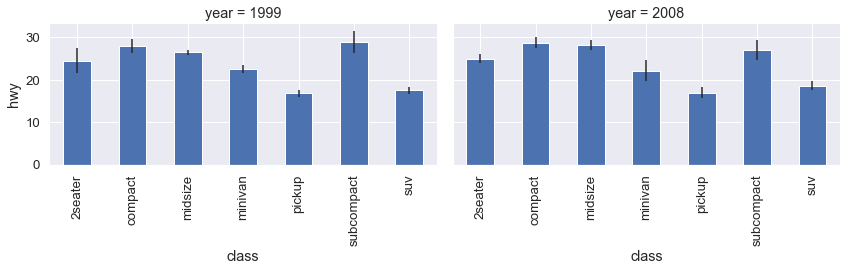

In [18]:
for m in ['cty', 'hwy']:
    g = sns.FacetGrid(ea, col='year', height=4, aspect=1.5)
    g.map_dataframe(edu.plot_facet_measure, "class", m, kind='bar')

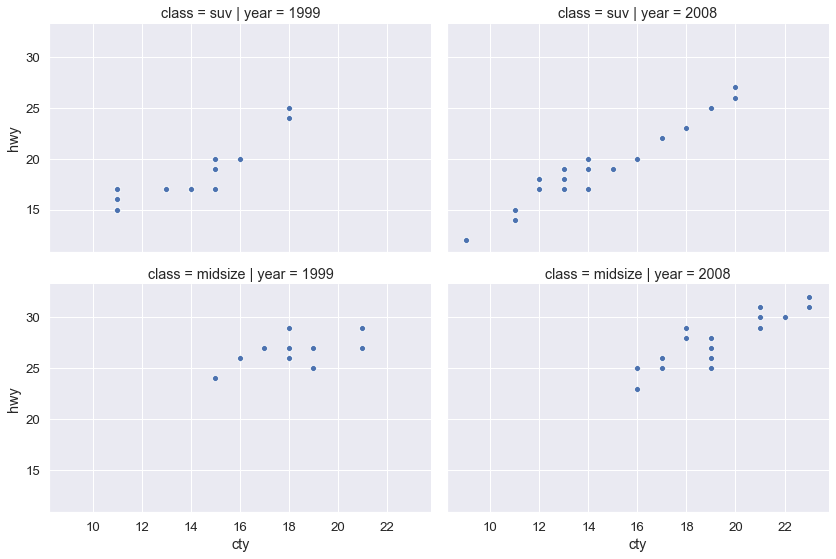

In [19]:
g = sns.FacetGrid(mpg, col='year', row='class', row_order=['suv', 'midsize'], height=4, aspect=1.5)
g.map_dataframe(sns.scatterplot, "cty", 'hwy')